In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import sys
sys.path.append("../scripts")

import data_preprocessing as dp
import data_cleaning      as dc
import data_visualization as dv
import data_extraction    as de
import task1
import task2
import task3
import task4

In [2]:
# Load data
# Load data from postgres database
query = 'select * from xdr_data;'
df = de.load_data_from_postgres(query)

Data successfully imported from postgres


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

**Engagement Score**

In [5]:
# Copy the data for manipulation
df_engagement = df.copy()

In [6]:
# Aggregate the engagement metrics
df_engagement_grouped = task1.aggregation(df_engagement)

In [7]:
df_engagement_grouped.head()

,MSISDN/Number,xDR_sessions,session_duration,total_DL,total_UL,total_social_media,total_youtube,total_Netflix,total_Google,total_Email,total_Gaming,total_Other,total_data
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2232135.0,21624548.0,27180981.0,4389005.0,1331362.0,8.124587e+08,386570872.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2660565.0,12432223.0,11221763.0,5334863.0,3307781.0,1.197501e+08,281710071.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3195623.0,21333570.0,19353900.0,3443126.0,3205380.0,5.388277e+08,501693672.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,280294.0,6977321.0,1942092.0,9678493.0,2284670.0,3.911261e+08,35279702.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2912542.0,41533002.0,49201724.0,18499616.0,3305469.0,1.314798e+09,804804484.0,1.457411e+09


In [8]:
# Filter the engagement metrics
df_engagement_metrics = task2.engagement_metrics(df_engagement_grouped)

In [9]:
df_engagement_metrics.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09


In [10]:
# K means clustering

task2.kmeans_clustering(df_engagement_metrics)

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster
0,3.360100e+10,1,116720.0,8.786906e+08,1
1,3.360100e+10,1,181230.0,1.568596e+08,1
2,3.360100e+10,1,134969.0,5.959665e+08,1
3,3.360101e+10,1,49878.0,4.223207e+08,1
4,3.360101e+10,2,37104.0,1.457411e+09,2
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08,1
106852,3.379000e+10,1,140988.0,4.803073e+08,1
106853,3.197021e+12,1,877385.0,2.321240e+08,1
106854,3.370000e+14,1,253030.0,5.962878e+08,1


In [11]:
#Cluster summary
df_cluster_summary = df_engagement_metrics.groupby('cluster').agg({'sessions_frequency': ['min','max','mean','sum'],
                                                  'session_duration': ['min','max','mean','sum'],
                                                  'total_traffic': ['min','max','mean','sum']})

df_cluster_summary

sessions_frequency                      session_duration              \
                       min max      mean    sum              min         max   
cluster                                                                        
0                        1  18  4.399944  15743          66594.0  18553754.0   
1                        0   2  1.022451  81610           7142.0    877385.0   
2                        1   4  2.180435  51153          18235.0   1480875.0   

                                     total_traffic                \
                  mean           sum           min           max   
cluster                                                            
0        656274.260481  2.348149e+09   370420998.0  8.846226e+09   
1        103063.468779  8.226320e+09    33249009.0  1.427100e+09   
2        215019.965942  5.044368e+09   118487293.0  2.512802e+09   

                                     
                 mean           sum  
cluster                              
0        2.286624e+09  8.181541e+12  
1        4.950560e+08  3.951438e+13  
2        1.114131e+09  2.613752e+13

**cluster_1 is the less engaged cluster**

In [12]:
centroids = task2.centroids(df_engagement_metrics)

In [13]:
centroids

array([[ 3.71325469,  2.73387952,  3.24708014],
       [-0.45376432, -0.23130937, -0.39897854],
       [ 0.97567411,  0.36878701,  0.86060373]])

In [14]:
# Calculate the engagement score as the euclidean distance between the user data points and the less engaged cluster

df_engagement_metrics['engagement_score'] = euclidean_distances(df_engagement_metrics[['sessions_frequency','session_duration','total_traffic']],
                                                                [centroids[1]])

In [15]:
df_engagement_metrics.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster,engagement_score
0,3.360100e+10,1,116720.0,8.786906e+08,1,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08,1,1.568597e+08
2,3.360100e+10,1,134969.0,5.959665e+08,1,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08,1,4.223207e+08
4,3.360101e+10,2,37104.0,1.457411e+09,2,1.457411e+09


**Experience Score**

In [16]:
# Copy the dataframe
df_experience = df.copy()

In [17]:
df_experience.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [18]:
# Filter the data for analysis
df_experience = task3.filter_data(df_experience)

In [19]:
df_experience.head()

,MSISDN/Number,TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type
0,3.366496e+10,NaN,NaN,42.0,5.0,23.0,44.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,NaN,NaN,65.0,5.0,16.0,26.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,NaN,NaN,NaN,NaN,44.0,44.0,undefined
4,3.369980e+10,NaN,NaN,NaN,NaN,6.0,9.0,Samsung Sm-G390F


In [20]:
#Replace missing values
task3.replace_with_median(df_experience)

Numerical columns: ['TCP UL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'] replaced with the median value


In [21]:
# Aggregate the data
df_experience_metrics = task3.experience_metrics(df_experience)

In [22]:
df_experience_metrics.head()

,MSISDN/Number,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0
1,3.360100e+10,Apple iPhone 7 (A1778),589679.5,31.0,99.0
2,3.360100e+10,undefined,589679.5,50.0,97.0
3,3.360101e+10,Apple iPhone 5S (A1457),22015.5,84.0,248.0
4,3.360101e+10,Apple iPhone Se (A1723),9960511.5,119.0,56844.0


In [23]:
# K means clustering
task3.kmeans_clustering(df_experience_metrics)

In [24]:
df_experience_metrics.head()

,MSISDN/Number,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed,cluster
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0,1
1,3.360100e+10,Apple iPhone 7 (A1778),589679.5,31.0,99.0,1
2,3.360100e+10,undefined,589679.5,50.0,97.0,1
3,3.360101e+10,Apple iPhone 5S (A1457),22015.5,84.0,248.0,1
4,3.360101e+10,Apple iPhone Se (A1723),9960511.5,119.0,56844.0,1


In [25]:
#Cluster summary
df_cluster_summary = df_experience_metrics.groupby('cluster').agg({'total_TCP_vol': ['min','max','mean','sum'],
                                                  'total_RTT_vol': ['min','max','mean','sum'],
                                                  'total_throughput_speed': ['min','max','mean','sum']})

In [26]:
df_cluster_summary

total_TCP_vol                                           total_RTT_vol  \
                  min           max          mean           sum           min   
cluster                                                                         
0        1.080000e+03  1.460242e+09  3.726699e+07  4.145580e+11          21.0   
1        9.700000e+01  1.377064e+09  2.835744e+06  2.708249e+11           0.0   
2        1.449595e+09  8.354209e+09  2.922294e+09  6.838167e+11          52.0   

                                         total_throughput_speed            \
             max        mean         sum                    min       max   
cluster                                                                     
0        96924.0  402.146440   4473477.0                    3.0  902222.0   
1         6267.0  126.554280  12086440.0                    0.0   65552.0   
2         2860.0  377.982906     88448.0                 8876.0  549661.0   

                                      
                  mean           sum  
cluster                               
0        116256.848706  1.293241e+09  
1          9571.147701  9.140829e+08  
2        150358.752137  3.518395e+07

**Users in cluster_1 has the worst experience**

In [27]:
centroids_1 = task3.centroids(df_experience_metrics)

In [28]:
centroids_1

array([[ 0.1588513 ,  0.36648644,  2.24066002],
       [-0.06493737, -0.04367106, -0.26950628],
       [18.91352518,  0.33145086,  3.04880029]])

In [29]:
# Calculate the engagement score as the euclidean distance between the user data points and the less engaged cluster

df_experience_metrics['experience_score'] = euclidean_distances(df_experience_metrics[['total_TCP_vol','total_RTT_vol','total_throughput_speed']],
                                                                [centroids_1[1]])

In [30]:
df_experience_metrics

,MSISDN/Number,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed,cluster,experience_score
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0,1,5.896796e+05
1,3.360100e+10,Apple iPhone 7 (A1778),589679.5,31.0,99.0,1,5.896796e+05
2,3.360100e+10,undefined,589679.5,50.0,97.0,1,5.896796e+05
3,3.360101e+10,Apple iPhone 5S (A1457),22015.5,84.0,248.0,1,2.201713e+04
4,3.360101e+10,Apple iPhone Se (A1723),9960511.5,119.0,56844.0,1,9.960674e+06
...,...,...,...,...,...,...,...
106857,3.379000e+10,Huawei Honor 9 Lite,218045.0,52.0,10365.0,1,2.182913e+05
106858,3.379000e+10,Apple iPhone 8 Plus (A1897),589679.5,40.0,116.0,1,5.896796e+05
106859,3.197021e+12,Quectel Wireless. Quectel Ec25-E,589679.5,50.0,1.0,1,5.896796e+05
106860,3.370000e+14,Huawei B525S-23A,589679.5,50.0,33.0,1,5.896796e+05


**Merge the Experience and Engagement score results based on MSISDN/Number**

In [31]:
# Merge
df_merged = pd.merge(df_engagement_metrics,df_experience_metrics,on='MSISDN/Number',how='inner')

In [32]:
df_merged.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster_x,engagement_score,Handset Type,total_TCP_vol,total_RTT_vol,total_throughput_speed,cluster_y,experience_score
0,3.360100e+10,1,116720.0,8.786906e+08,1,8.786906e+08,Huawei P20 Lite Huawei Nova 3E,589679.5,46.0,76.0,1,5.896796e+05
1,3.360100e+10,1,181230.0,1.568596e+08,1,1.568597e+08,Apple iPhone 7 (A1778),589679.5,31.0,99.0,1,5.896796e+05
2,3.360100e+10,1,134969.0,5.959665e+08,1,5.959665e+08,undefined,589679.5,50.0,97.0,1,5.896796e+05
3,3.360101e+10,1,49878.0,4.223207e+08,1,4.223207e+08,Apple iPhone 5S (A1457),22015.5,84.0,248.0,1,2.201713e+04
4,3.360101e+10,2,37104.0,1.457411e+09,2,1.457411e+09,Apple iPhone Se (A1723),9960511.5,119.0,56844.0,1,9.960674e+06


In [33]:
#Filter only the required columns
df_final = df_merged[['MSISDN/Number','engagement_score','experience_score']]

In [34]:
df_final.head()

,MSISDN/Number,engagement_score,experience_score
0,3.360100e+10,8.786906e+08,5.896796e+05
1,3.360100e+10,1.568597e+08,5.896796e+05
2,3.360100e+10,5.959665e+08,5.896796e+05
3,3.360101e+10,4.223207e+08,2.201713e+04
4,3.360101e+10,1.457411e+09,9.960674e+06


In [35]:
#Calculate the satisfaction score as the mean of engagement and experience score
df_final['satisfaction_score'] = df_final[['engagement_score','experience_score']].mean(axis=1)

C:\Users\wasihunt\AppData\Local\Temp\ipykernel_8872\2750822156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['satisfaction_score'] = df_final[['engagement_score','experience_score']].mean(axis=1)


In [36]:
df_final

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,8.786906e+08,5.896796e+05,4.396401e+08
1,3.360100e+10,1.568597e+08,5.896796e+05,7.872471e+07
2,3.360100e+10,5.959665e+08,5.896796e+05,2.982781e+08
3,3.360101e+10,4.223207e+08,2.201713e+04,2.111714e+08
4,3.360101e+10,1.457411e+09,9.960674e+06,7.336858e+08
...,...,...,...,...
106857,3.379000e+10,7.146416e+08,2.182913e+05,3.574300e+08
106858,3.379000e+10,4.803074e+08,5.896796e+05,2.404485e+08
106859,3.197021e+12,2.321256e+08,5.896796e+05,1.163577e+08
106860,3.370000e+14,5.962879e+08,5.896796e+05,2.984388e+08


In [37]:
#Top 10 satisfied customers
df_final.nlargest(10,'satisfaction_score')

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
66863,3.366773e+10,2.205487e+09,8.354209e+09,5.279848e+09
34126,3.365908e+10,1.652832e+09,7.941860e+09,4.797346e+09
42369,3.366098e+10,2.172160e+09,7.374160e+09,4.773160e+09
98219,3.376264e+10,3.262941e+09,5.879989e+09,4.571465e+09
6438,3.361489e+10,8.846232e+09,7.073833e+06,4.426653e+09
92929,3.376054e+10,8.514779e+09,4.040822e+07,4.277594e+09
13181,3.362578e+10,8.499641e+09,7.472250e+06,4.253557e+09
100474,3.376386e+10,3.168156e+09,5.095685e+09,4.131921e+09
13527,3.362632e+10,7.971172e+09,6.810977e+06,3.988992e+09
70916,3.366905e+10,2.794539e+09,5.174805e+09,3.984672e+09


<Axes: >

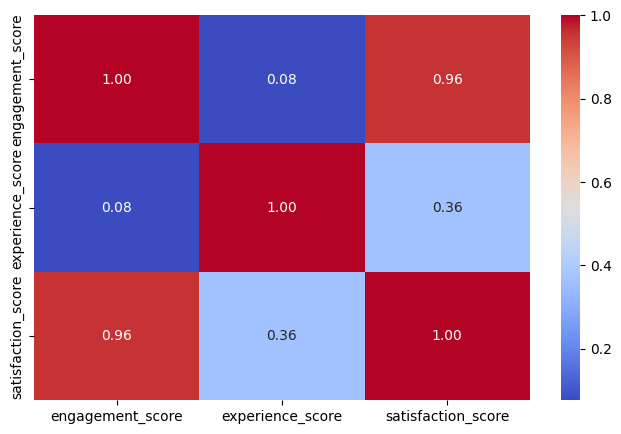

In [53]:
#Correlation
columns =['engagement_score','experience_score','satisfaction_score']
correlation = df_final[columns].corr()
fig3, axes = plt.subplots(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

**Build a Linear regression model to predict the satisfaction score based on the engagement and experience score**

In [39]:
#Split the data into features (X) and target (y)

X = df_final[['engagement_score', 'experience_score']]
y = df_final['satisfaction_score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Check for NaN values in X_train
print("Checking for NaN values in X_train:")
print(X_train.isnull().sum())

# Check for NaN values in y_train
print("Checking for NaN values in y_train:")
print(y_train.isnull().sum())

Checking for NaN values in X_train:
engagement_score    0
experience_score    0
dtype: int64
Checking for NaN values in y_train:
0


In [41]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predictions
y_pred = model.predict(X_test)

In [43]:
# Metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 6.255268868996126e-15
R-squared: 1.0


In [44]:
# Compare predictions and actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

             Actual     Predicted
24383  4.099746e+08  4.099746e+08
28359  4.161678e+08  4.161678e+08
4025   3.107457e+08  3.107457e+08
38545  3.687358e+08  3.687358e+08
47509  9.055806e+07  9.055806e+07
...             ...           ...
52180  1.910960e+08  1.910960e+08
71858  2.241627e+08  2.241627e+08
27386  1.715648e+08  1.715648e+08
79866  1.222921e+08  1.222921e+08
42284  4.443583e+08  4.443583e+08

[21373 rows x 2 columns]


**Overall the model performed very well**

**Run a K means clustering where k=2**

In [45]:
# Normalize the data
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(df_final[['engagement_score','experience_score']])

# K-means Clustering (k=3)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(metrics_scaled)
df_final['cluster'] = kmeans.labels_

C:\Users\wasihunt\AppData\Local\Temp\ipykernel_8872\2553982554.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans.labels_


In [46]:
df_final.sample(5)

,MSISDN/Number,engagement_score,experience_score,satisfaction_score,cluster
18123,3.363539e+10,8.491191e+08,1.179359e+06,4.251492e+08,1
48354,3.366240e+10,9.049303e+08,7.605856e+04,4.525032e+08,1
62783,3.366637e+10,4.105017e+08,5.896796e+05,2.055457e+08,1
47587,3.366222e+10,6.842323e+08,5.896796e+05,3.424110e+08,1
52285,3.366335e+10,9.339659e+07,5.896796e+05,4.699313e+07,1


In [47]:
# Aggregate the average satisfaction and experience score per cluster
df_cluster_average = df_final.groupby('cluster')[['experience_score','satisfaction_score']].mean()

print("Average Satisfaction & Experience Scores per Cluster:\n", df_cluster_average)

Average Satisfaction & Experience Scores per Cluster:
          experience_score  satisfaction_score
cluster                                      
0            6.466913e+07        8.259509e+08
1            3.900306e+06        2.704114e+08


**Export to Postgres database**

In [48]:
df_final = df_final[['MSISDN/Number','engagement_score','experience_score','satisfaction_score']]
task4.to_postgre(df_final, 'user_score')

DataFrame exported successfully!
